# Desafio - Modelo Preditivo
## Introdução
Imagine que você trabalhe em uma empresa de consultoria especializada em soluções de dados e inteligência de crédito. Atuando com grandes instituições financeiras, desenvolvendo modelos preditivos, sistema de apoio à decisão e estratégias baseadas em dados. Você foi alocado em um projeto que envolve o acompanhamento de transações financeiras realizadas por clientes ao longo do tempo.

## Objetivo Principal
Desenvolver um **modelo preditivo** capaz de estimar a probabilidade de inadimplência de cobranças mensais feitas aos clientes.

A **inadimplência** é definida da seguinte forma:
> Um pagamento é considerado inadimplente se for realizado com **5 dias ou mais de atraso** em relação à data de vencimento.

As previsões devem conter apenas a probabilidade de inadimplência (valores entre 0 e 1).

## Plano de Ação
1. Limpeza dos Dados
2. Analise Exploratória dos Dados
3. Treinamento do Modelo Preditivo

A estratégia utilizada aqui foi dividir o desafio em três arquivos .ipynb, cada um abordando uma etapa.
1. **DESAFIO - PARTE I:** Manipulação do dataset para limpar dados vazios e prepará-lo para a análise exploratória;
2. **DESAFIO - PARTE II:** Análise exploratória dos dados e análise de insigths;
3. **DESAFIO - PARTE III:** Cronstrução do modelo preditivo e análise de performance.

# 1. Limpeza dos Dados

## 1.1 Importanto bibliotecas e dataset

In [1]:
# Import das bibliotecas que serão utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Lendo os arquivos .csv 
base_cadastral = pd.read_csv("data/base_cadastral.csv", sep = ";")
base_pagamentos = pd.read_csv('data/base_pagamentos_desenvolvimento.csv', sep = ';')
base_info = pd.read_csv('data/base_info.csv', sep = ';')

In [3]:
# junta base_pagamentos com base_info (mesma chave composta)
df_temp = pd.merge(
    base_pagamentos,
    base_info,
    on=['ID_CLIENTE', 'SAFRA_REF'],
    how='left'   # left para manter todos os pagamentos
)

# junta com base_cadastral (por ID_CLIENTE)
df_desafio = pd.merge(
    df_temp,
    base_cadastral,
    on='ID_CLIENTE',
    how='left'
)

display(df_desafio)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,NaN,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,NaN,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,NaN,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,NaN,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,NaN,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,11,NaN,Comércio,AOL,PEQUENO,13
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,19,NaN,Indústria,GMAIL,GRANDE,25
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,NaN,2011-02-15,91,NaN,Serviços,HOTMAIL,GRANDE,67
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,NaN,2021-05-13,(1,NaN,Serviços,YAHOO,MEDIO,14


In [4]:
# Importando o Profipandas profiling do ydata-profiling
from ydata_profiling import ProfileReport

# Gerando a visualização
profile = ProfileReport(df_desafio, title = 'Desafio_Modelo_Preditivo')

# Criando o relatório
profile.to_file('Desafio_Modelo_Preditivo.html')

/home/rafael/Downloads/Projeto - Modelo Preditivo/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 240.24it/s]


## 1.2 Sumário do Dataset
- **ID_CLIENTE**: Identificador único do cliente.
- **SAFRA_REF**: Mês de referência da amostra​
- **DATA_EMISSAO_DOCUMENTO**: Data da emissão da nota de crédito​
- **DATA_PAGAMENTO**: Data em que o cliente realizou o pagamento da nota
- **DATA_VENCIMENTO**: Data limite para pagamento do empréstimo​
- **VALOR_A_PAGAR**: Valor da nota de crédito​
- **TAXA**: Taxa de juros cobrada no empréstimo​
- **RENDA_MES_ANTERIOR**: Renda ou faturamento declarado pelo cliente no
fim do mês anterior​
- **NO_FUNCIONARIOS**: Número de funcionários reportado pelo cliente no
fim do mês anterior
- **DATA_CADASTRO**: Data da realização do cadastro no sistema.
- **DDD**: Número do DDD do telefone do cliente.
- **FLAG_PF**: Indica se o cliente é uma pessoa física (‘X’) ou jurídica (‘NaN’). 
- **SEGMENTO_INDUSTRIAL**: Indica a qual segmento da indústria pertence o
cliente. 
- **DOMINIO_EMAIL**: Indica o domínio(ou provedor) do email utilizado para o
cadastro.
- **PORTE**: Indica o porte (tamanho) da empresa.
- **CEP_2_DIG**: Indica os dois primeiros números do CEP do endereço cadastrado.

## 1.3 Limpeza dos Dados
Vamos explorar a quantidade de dados vazio presente no dataset e analisar estratégias de como preencher os dados faltantes.

In [4]:
def descricão(df):
    resumo = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo': df.dtypes.values,
        'Quantidade de Dados Não Vazios': df.notna().sum().values,
        'Quantidade de Dados Vazios': df.isna().sum().values,
        'Porcentagem de Valor Vazios (%)': (df.isna().mean() * 100).round(2).values
    })

    styled = (resumo.style
        .set_properties(**{
            'background-color': "#0f010194", 
            'border-color': 'black',
            'text-align': 'center'
        })
        .background_gradient(subset=['Porcentagem de Valor Vazios (%)'], cmap='Reds')
        .bar(subset=['Quantidade de Dados Vazios'], color='lightblue')
        .set_table_styles([
            {
                'selector': 'th',
                'props': [
                    ('background-color', '#0d253f'),
                    ('color', 'white'),
                    ('text-align', 'center'),
                    ('font-size', '12px')
                ]
            }
        ])
    )
    return styled


In [5]:
descricão(df_desafio)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,77414,0,0.000000
1,SAFRA_REF,object,77414,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,object,77414,0,0.000000
3,DATA_PAGAMENTO,object,77414,0,0.000000
4,DATA_VENCIMENTO,object,77414,0,0.000000
5,VALOR_A_PAGAR,float64,76244,1170,1.510000
6,TAXA,float64,77414,0,0.000000
7,RENDA_MES_ANTERIOR,float64,71282,6132,7.920000
8,NO_FUNCIONARIOS,float64,69827,7587,9.800000
9,DATA_CADASTRO,object,77414,0,0.000000


Antes de irmos explorar os dados e tirar insghts deles, vamos ver como se podemos eliminar esses dados faltantes ou tentar alguma estratégia para completar as células vazias.

Vamos primeiro analisar a coluna `FLAG_PF`. Vemos que existe uma discrepância muito grande da coluna `FLAG_PF`, vamos tratar esse dados.

Uma informação que temos é que esta coluna está classificada da seguinte maneira:
- Se o cliente é uma Pessoa Física no dataset está definido como (`X`) 
- Se o cliente é uma Pessoa Jurídica esta cadastro como (`NaN`).

In [6]:
# Altera o Nan presente na tabela para Jurídico para facilitar o entendimento
df_desafio['FLAG_PF'] = df_desafio['FLAG_PF'].fillna('Juridico')

# Altera o X presente na tabela para Pessoa Física para facilitar o entendimento
df_desafio['FLAG_PF'] = df_desafio['FLAG_PF'].replace('X', 'Pessoa_Fisica')
display(df_desafio)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,11,Juridico,Comércio,AOL,PEQUENO,13
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,19,Juridico,Indústria,GMAIL,GRANDE,25
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,NaN,2011-02-15,91,Juridico,Serviços,HOTMAIL,GRANDE,67
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,NaN,2021-05-13,(1,Juridico,Serviços,YAHOO,MEDIO,14


Agora vamos rever a quantidade de dados vazios, mas agora de forma gráfica.

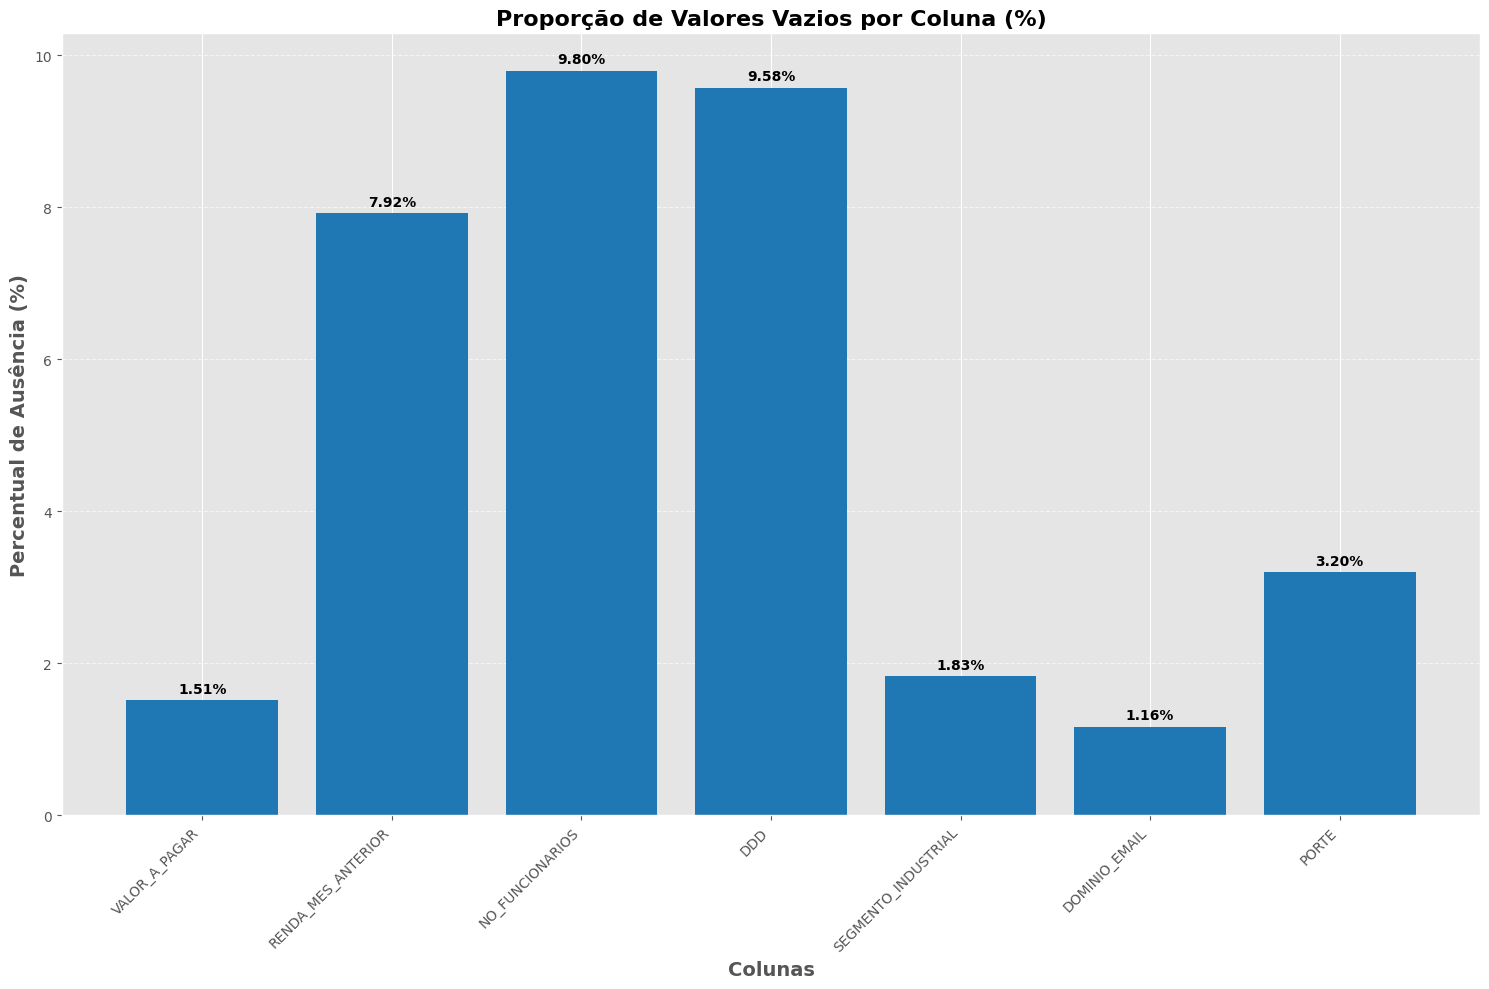

In [7]:
# Gráfico de dados ausento
colunas_vazias = df_desafio.columns[df_desafio.isnull().any()]
dados_ausentes = (df_desafio[colunas_vazias].isnull().sum() / len(df_desafio)) * 100

plt.figure(figsize=(15,10))
plt.style.use('ggplot')
plt.bar(dados_ausentes.index, dados_ausentes.values, color='#1f77b4')

plt.title('Proporção de Valores Vazios por Coluna (%)', fontsize=16, fontweight='bold')
plt.xlabel('Colunas', fontsize=14,  fontweight='bold')
plt.ylabel('Percentual de Ausência (%)',fontsize=14,  fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar os percentuais acima das barras
for i, valor in enumerate(dados_ausentes.values):
    plt.text(i, valor + 0.1, f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.3.1 Analisando o Número de Funcionários
Agora vamos analisar a quantidade de daddos vazios da Coluna `NO_FUNCIONARIOS`. 

In [8]:
df_desafio.NO_FUNCIONARIOS.describe().to_frame().style.background_gradient(cmap='Blues')

,NO_FUNCIONARIOS
count,69827.000000
mean,117.692812
std,18.779624
min,0.000000
25%,105.000000
50%,118.000000
75%,130.000000
max,198.000000


É possível ver que existe empresa com 0 funcionários, vamos eliminar essas linhas.

In [9]:
df_desafio['NO_FUNCIONARIOS'].eq(0).sum()
df_desafio = df_desafio[df_desafio['NO_FUNCIONARIOS'] != 0]

In [10]:
# Calcula a mediana da coluna
df_desafio.NO_FUNCIONARIOS.median()

np.float64(118.0)

In [11]:
# Relação entre número de funcionarios e o tamanho da empresa levando em consideração a mediana
df_desafio.groupby('PORTE')['NO_FUNCIONARIOS'].median().to_frame().style.background_gradient(cmap='Blues')

,NO_FUNCIONARIOS
PORTE,
GRANDE,121.000000
MEDIO,116.000000
PEQUENO,114.000000


In [12]:
df_desafio.groupby(['PORTE', 'SEGMENTO_INDUSTRIAL'])['NO_FUNCIONARIOS'].median().to_frame().style.background_gradient(cmap='Blues')

In [13]:
# Cria uma coluna chamada 'teste' que irá conter a mediana do número de funcionarios em relação ao porte da empresa e o segmento onde ela atua.
df_desafio['teste']= df_desafio.groupby(['PORTE', 'SEGMENTO_INDUSTRIAL'])['NO_FUNCIONARIOS'].transform('median')

# Cria outra coluna chamada 'teste2' que analisa onde tem dados vazios e preenche com valores novos da coluna 'teste' e não altera os valores já existentes
df_desafio['teste2']= df_desafio.NO_FUNCIONARIOS.fillna(df_desafio.groupby(['PORTE', 'SEGMENTO_INDUSTRIAL'])['NO_FUNCIONARIOS'].transform('median'))

In [14]:
display(df_desafio)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,teste,teste2
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65,115.0,115.0
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65,115.0,115.0
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65,115.0,115.0
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65,115.0,115.0
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,NaN,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65,115.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,11,Juridico,Comércio,AOL,PEQUENO,13,113.0,161.0
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,19,Juridico,Indústria,GMAIL,GRANDE,25,125.0,87.0
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,NaN,2011-02-15,91,Juridico,Serviços,HOTMAIL,GRANDE,67,122.0,122.0
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,NaN,2021-05-13,(1,Juridico,Serviços,YAHOO,MEDIO,14,115.0,115.0


In [15]:
# Substituir os dados novos na coluna 'NO_FUNCIONARIOS'
df_desafio['NO_FUNCIONARIOS'] = df_desafio.NO_FUNCIONARIOS.fillna(df_desafio.groupby(['PORTE', 'SEGMENTO_INDUSTRIAL'])['NO_FUNCIONARIOS'].transform('median'))

# Exclui as colunas 'teste', 'teste2'
df_desafio = df_desafio.drop(['teste', 'teste2'], axis=1)

display(df_desafio)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,115.0,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,115.0,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,115.0,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,115.0,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,115.0,2013-08-22,99,Juridico,Serviços,YAHOO,PEQUENO,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,11,Juridico,Comércio,AOL,PEQUENO,13
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,19,Juridico,Indústria,GMAIL,GRANDE,25
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,91,Juridico,Serviços,HOTMAIL,GRANDE,67
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,115.0,2021-05-13,(1,Juridico,Serviços,YAHOO,MEDIO,14


In [16]:
descricão(df_desafio)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,77267,0,0.000000
1,SAFRA_REF,object,77267,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,object,77267,0,0.000000
3,DATA_PAGAMENTO,object,77267,0,0.000000
4,DATA_VENCIMENTO,object,77267,0,0.000000
5,VALOR_A_PAGAR,float64,76098,1169,1.510000
6,TAXA,float64,77267,0,0.000000
7,RENDA_MES_ANTERIOR,float64,71138,6129,7.930000
8,NO_FUNCIONARIOS,float64,76850,417,0.540000
9,DATA_CADASTRO,object,77267,0,0.000000


Os valores que continuaram vazios, irei completar com a mediana

In [17]:
df_desafio.NO_FUNCIONARIOS.describe().to_frame().style.background_gradient(cmap='Blues')

,NO_FUNCIONARIOS
count,76850.000000
mean,117.938100
std,17.177190
min,60.000000
25%,107.000000
50%,117.000000
75%,129.000000
max,198.000000


In [18]:
mediana = df_desafio['NO_FUNCIONARIOS'].median()
print(mediana)

117.0


In [19]:
df_desafio['NO_FUNCIONARIOS'] = df_desafio['NO_FUNCIONARIOS'].fillna(mediana)

In [20]:
descricão(df_desafio)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,77267,0,0.000000
1,SAFRA_REF,object,77267,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,object,77267,0,0.000000
3,DATA_PAGAMENTO,object,77267,0,0.000000
4,DATA_VENCIMENTO,object,77267,0,0.000000
5,VALOR_A_PAGAR,float64,76098,1169,1.510000
6,TAXA,float64,77267,0,0.000000
7,RENDA_MES_ANTERIOR,float64,71138,6129,7.930000
8,NO_FUNCIONARIOS,float64,77267,0,0.000000
9,DATA_CADASTRO,object,77267,0,0.000000


### 1.3.2 Exclusão da Coluna DDD
Estes dados não serão necessários para a analise, e como quase 10% deles apresentam dados vazios, optei por excluir

In [21]:
df_desafio = df_desafio.drop(['DDD'], axis=1)

### 1.3.4 Analisando o Porte da Empresa
Para a coluna `PORTE` irei usar a que aparece com mais frequência para completar os dados faltantes.

In [22]:
# Calcula a moda (valor mais frequente)
moda_valor = df_desafio['PORTE'].mode()[0]
print(moda_valor)

MEDIO


In [23]:
# Preenche os valores vazios com a moda
df_desafio['PORTE'] = df_desafio['PORTE'].fillna(moda_valor)

### 1.3.4 Analisando Segmento Industrial e Dominio do Email
Aqui usarei a mesma estratégia usada anteriormente.

In [24]:
# Calcula a moda (valor mais frequente)
moda_seg = df_desafio['SEGMENTO_INDUSTRIAL'].mode()[0]
moda_email = df_desafio['DOMINIO_EMAIL'].mode()[0]

# Preenche os valores vazios com a moda
df_desafio['SEGMENTO_INDUSTRIAL'] = df_desafio['SEGMENTO_INDUSTRIAL'].fillna(moda_seg)
df_desafio['DOMINIO_EMAIL'] = df_desafio['DOMINIO_EMAIL'].fillna(moda_email)


Agora, vamos conferir a quantidade de dados ausentes pelo gráfico a seguir.

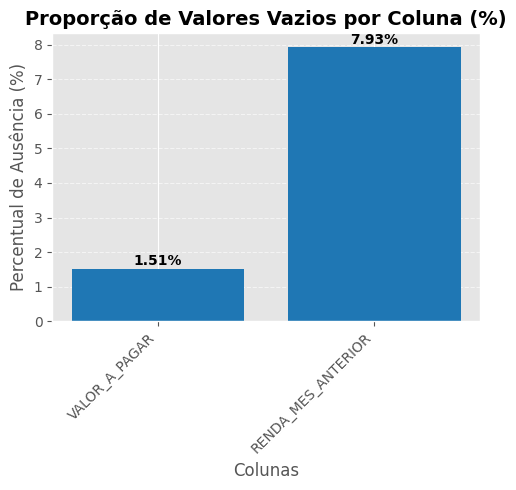

In [25]:
# Gráfico de dados ausento
colunas_vazias = df_desafio.columns[df_desafio.isnull().any()]
dados_ausentes = (df_desafio[colunas_vazias].isnull().sum() / len(df_desafio)) * 100

plt.figure(figsize=(5,5))
plt.bar(dados_ausentes.index, dados_ausentes.values, color='#1f77b4')

plt.title('Proporção de Valores Vazios por Coluna (%)', fontsize=14, fontweight='bold')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Ausência (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar os percentuais acima das barras
for i, valor in enumerate(dados_ausentes.values):
    plt.text(i, valor + 0.1, f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.3.5 Analise da coluna Valor a  Pagar

In [26]:
df_desafio.groupby('PORTE')['VALOR_A_PAGAR'].describe().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
PORTE,,,,,,,,
GRANDE,28550.000000,44243.789187,40079.639517,0.100000,18694.892500,32400.060000,56521.497500,1391835.200000
MEDIO,31864.000000,48224.429579,52587.789340,0.400000,18799.950000,36844.225000,64165.180000,4400000.000000
PEQUENO,15684.000000,47680.779861,43724.449115,15.000000,18912.262500,36201.795000,61864.050000,1160000.000000


In [27]:
df_desafio.groupby(['PORTE', 'NO_FUNCIONARIOS'])['VALOR_A_PAGAR'].median()

PORTE    NO_FUNCIONARIOS
GRANDE   70.0               24998.70
         72.0               19333.50
         73.0               61840.07
         74.0               20464.16
         75.0               25520.23
                              ...   
PEQUENO  178.0              35129.19
         181.0              20897.98
         182.0              44327.53
         185.0              43727.42
         187.0              41745.54
Name: VALOR_A_PAGAR, Length: 338, dtype: float64

In [28]:
# Cria uma coluna chamada 'teste' que irá conter a mediana do valor a pagar em relação ao porte da empresa e o numero de funcionarios.
df_desafio['teste']= df_desafio.groupby(['PORTE', 'NO_FUNCIONARIOS'])['VALOR_A_PAGAR'].transform('median')

# Cria outra coluna chamada 'teste2' que analisa onde tem dados vazios e preenche com valores novos da coluna 'teste' e não altera os valores já existentes
df_desafio['teste2']= df_desafio.VALOR_A_PAGAR.fillna(df_desafio.groupby(['PORTE', 'NO_FUNCIONARIOS'])['VALOR_A_PAGAR'].transform('median'))

In [29]:
display(df_desafio)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,teste,teste2
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,35616.135,35516.41
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,35616.135,17758.21
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,35616.135,17431.96
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,35616.135,1341.00
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,35616.135,21309.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,Juridico,Comércio,AOL,PEQUENO,13,13761.420,89980.00
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,Juridico,Indústria,GMAIL,GRANDE,25,32467.000,42239.00
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,Juridico,Serviços,HOTMAIL,GRANDE,67,30804.800,20921.50
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,115.0,2021-05-13,Juridico,Serviços,YAHOO,MEDIO,14,35305.200,90231.05


In [30]:
# Substituir os dados novos na coluna 'VALOR_A_PAGAR'
df_desafio['VALOR_A_PAGAR'] = df_desafio.VALOR_A_PAGAR.fillna(df_desafio.groupby(['PORTE', 'NO_FUNCIONARIOS'])['VALOR_A_PAGAR'].transform('median'))

# Exclui as colunas 'teste', 'teste2'
df_desafio = df_desafio.drop(['teste', 'teste2'], axis=1)

In [31]:
display(df_desafio)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,Juridico,Comércio,AOL,PEQUENO,13
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,Juridico,Indústria,GMAIL,GRANDE,25
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,Juridico,Serviços,HOTMAIL,GRANDE,67
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,115.0,2021-05-13,Juridico,Serviços,YAHOO,MEDIO,14


### 1.3.6 Analisa a Coluna 'RENDA_MES_ANTERIOR'

In [32]:
df_desafio.RENDA_MES_ANTERIOR.median()

np.float64(241196.0)

In [33]:
df_desafio.groupby(['PORTE', 'SEGMENTO_INDUSTRIAL', 'TAXA'])['RENDA_MES_ANTERIOR'].median()

PORTE    SEGMENTO_INDUSTRIAL  TAXA 
GRANDE   Comércio             4.99     245179.0
                              5.99     228480.0
                              6.99     235583.5
                              8.99     268258.0
                              11.99    245715.0
         Indústria            4.99     220230.0
                              5.99     245803.0
                              6.99     241371.0
                              8.99     239443.0
                              11.99    217444.0
         Serviços             4.99     244490.0
                              5.99     247027.0
                              6.99     246197.0
                              8.99     244652.5
                              11.99    251474.0
MEDIO    Comércio             4.99     274147.0
                              5.99     226334.0
                              6.99     260432.0
                              8.99     271524.0
                              11.99    245198.0
    

In [34]:
df_desafio['teste']= df_desafio.groupby(['PORTE', 'SEGMENTO_INDUSTRIAL', 'TAXA'])['RENDA_MES_ANTERIOR'].transform('median')

df_desafio['teste2']= df_desafio.RENDA_MES_ANTERIOR.fillna(df_desafio.groupby(['PORTE', 'SEGMENTO_INDUSTRIAL', 'TAXA'])['RENDA_MES_ANTERIOR'].transform('median'))

In [35]:
display(df_desafio)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,teste,teste2
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,217640.0,217640.0
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,217640.0,217640.0
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,217640.0,217640.0
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,217640.0,217640.0
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,NaN,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,217640.0,217640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,Juridico,Comércio,AOL,PEQUENO,13,255036.5,280343.0
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,Juridico,Indústria,GMAIL,GRANDE,25,245803.0,235315.0
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,Juridico,Serviços,HOTMAIL,GRANDE,67,247027.0,100006.0
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,NaN,115.0,2021-05-13,Juridico,Serviços,YAHOO,MEDIO,14,234489.0,234489.0


In [36]:
df_desafio['RENDA_MES_ANTERIOR'] = df_desafio.RENDA_MES_ANTERIOR.fillna(df_desafio.groupby(['PORTE', 'SEGMENTO_INDUSTRIAL', 'TAXA'])['RENDA_MES_ANTERIOR'].transform('median'))

In [37]:
# Exclui as colunas 'teste', 'teste2'
df_desafio = df_desafio.drop(['teste', 'teste2'], axis=1)

Agora não temos mais dados vazios no nosso dataframe.

In [38]:
descricão(df_desafio)

/home/rafael/Downloads/Projeto - Modelo Preditivo/.venv/lib/python3.12/site-packages/pandas/io/formats/style.py:4040: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,77267,0,0.000000
1,SAFRA_REF,object,77267,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,object,77267,0,0.000000
3,DATA_PAGAMENTO,object,77267,0,0.000000
4,DATA_VENCIMENTO,object,77267,0,0.000000
5,VALOR_A_PAGAR,float64,77267,0,0.000000
6,TAXA,float64,77267,0,0.000000
7,RENDA_MES_ANTERIOR,float64,77267,0,0.000000
8,NO_FUNCIONARIOS,float64,77267,0,0.000000
9,DATA_CADASTRO,object,77267,0,0.000000


# 2 Dados Limpos
Agora que conseguimos preencher os dados ausentes, temos um dataset completo pronto uma análise exploratória.

In [39]:
display(df_desafio)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,Juridico,Comércio,AOL,PEQUENO,13
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,Juridico,Indústria,GMAIL,GRANDE,25
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,Juridico,Serviços,HOTMAIL,GRANDE,67
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,Juridico,Serviços,YAHOO,MEDIO,14


Optei por salva esse dataset em um arquivo .csv para facilitar a organização do projeto. Agora iremos para a PARTE II, onde iremo embusca de insights que possibilitem uma visão do problema de negócio a ser resolvido.

In [40]:
df_desafio.to_csv('docs/dataset_sem_dados_faltantes.csv', index=False)

# 3 Limpeza dos Dados de Teste
Uma etapa crucial em um projeto de Machine Learning consiste em tratar também os dados de teste para garantir que o modelo aprenda padrões reais em vez de ruído, e para avaliar seu desempenho de forma justa e imparcial.

In [ ]:
teste = pd.read_csv('data/base_pagamentos_teste.csv', sep = ';')

In [43]:
display(teste)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99
...,...,...,...,...,...,...
12270,705648002974742140,2021-11,2021-11-25,2021-12-13,47010.00,6.99
12271,4993499380140734678,2021-11,2021-11-25,2021-12-13,122875.35,8.99
12272,4614484019183480654,2021-11,2021-11-26,2028-09-30,302200.00,5.99
12273,1299146298565441811,2021-11,2021-11-26,2021-12-13,143791.85,5.99


In [44]:
descricão(teste)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,12275,0,0.000000
1,SAFRA_REF,object,12275,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,object,12275,0,0.000000
3,DATA_VENCIMENTO,object,12275,0,0.000000
4,VALOR_A_PAGAR,float64,12144,131,1.070000
5,TAXA,float64,12275,0,0.000000


In [45]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12275 entries, 0 to 12274
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              12275 non-null  int64  
 1   SAFRA_REF               12275 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  12275 non-null  object 
 3   DATA_VENCIMENTO         12275 non-null  object 
 4   VALOR_A_PAGAR           12144 non-null  float64
 5   TAXA                    12275 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 575.5+ KB


Vamos tratar esses dados e garantir que eles estejam no formato certo para quando formos utilizar ele.

## 3.1 Análise dos Valores Vazios
É necessário que a base de teste não tenha valores nulos ou vazios, então vamos analisar a coluna `VALOR_A_PAGAR` e buscar uma estrátegia para completar o que está faltando.

In [46]:
mediana_teste = teste['VALOR_A_PAGAR'].median()
print(mediana_teste)

49665.21


Como existem poucos valores vazios, irei optar por preenche-los com a mediana.

In [47]:
teste['VALOR_A_PAGAR'] = teste['VALOR_A_PAGAR'].fillna(mediana_teste)

In [48]:
descricão(teste)

/home/rafael/Downloads/Projeto - Modelo Preditivo/.venv/lib/python3.12/site-packages/pandas/io/formats/style.py:4040: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,12275,0,0.000000
1,SAFRA_REF,object,12275,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,object,12275,0,0.000000
3,DATA_VENCIMENTO,object,12275,0,0.000000
4,VALOR_A_PAGAR,float64,12275,0,0.000000
5,TAXA,float64,12275,0,0.000000


## 3.2 Tratamento do Tipo de Dado
Agora que não temos mais valores vazios, é preciso análise o `dtype` dos dados para que quando formos construir o modelo termos apenas valores numéricos.  

In [50]:
# Transformar colunas object para datetime
cols = ['DATA_EMISSAO_DOCUMENTO', 'DATA_VENCIMENTO']
teste[cols] = teste[cols].apply(pd.to_datetime)

Separa os dados das colunas: `EMISSAO_DOCUMENTO`, `DATA_VENCIMENTO`.

In [51]:
# Coluna Emissão Documentos
teste["Mes_Emissao_Documento"] = teste["DATA_EMISSAO_DOCUMENTO"].dt.month
teste["Dia_Emissao_Documento"] = teste["DATA_EMISSAO_DOCUMENTO"].dt.day

# Coluna Mês Vencimento 
teste["Mes_Vencimento"] = teste["DATA_VENCIMENTO"].dt.month
teste["Dia_Vencimento"] = teste["DATA_VENCIMENTO"].dt.day

display(teste)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,Mes_Emissao_Documento,Dia_Emissao_Documento,Mes_Vencimento,Dia_Vencimento
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99,7,14,8,4
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99,7,8,8,23
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99,7,11,8,25
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99,7,16,8,30
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99,7,5,7,30
...,...,...,...,...,...,...,...,...,...,...
12270,705648002974742140,2021-11,2021-11-25,2021-12-13,47010.00,6.99,11,25,12,13
12271,4993499380140734678,2021-11,2021-11-25,2021-12-13,122875.35,8.99,11,25,12,13
12272,4614484019183480654,2021-11,2021-11-26,2028-09-30,302200.00,5.99,11,26,9,30
12273,1299146298565441811,2021-11,2021-11-26,2021-12-13,143791.85,5.99,11,26,12,13


In [52]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12275 entries, 0 to 12274
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              12275 non-null  int64         
 1   SAFRA_REF               12275 non-null  object        
 2   DATA_EMISSAO_DOCUMENTO  12275 non-null  datetime64[ns]
 3   DATA_VENCIMENTO         12275 non-null  datetime64[ns]
 4   VALOR_A_PAGAR           12275 non-null  float64       
 5   TAXA                    12275 non-null  float64       
 6   Mes_Emissao_Documento   12275 non-null  int32         
 7   Dia_Emissao_Documento   12275 non-null  int32         
 8   Mes_Vencimento          12275 non-null  int32         
 9   Dia_Vencimento          12275 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(4), int64(1), object(1)
memory usage: 767.3+ KB


In [55]:
teste = teste.drop(['DATA_EMISSAO_DOCUMENTO', 'DATA_VENCIMENTO'], axis=1)

In [56]:
display(teste)

,ID_CLIENTE,SAFRA_REF,VALOR_A_PAGAR,TAXA,Mes_Emissao_Documento,Dia_Emissao_Documento,Mes_Vencimento,Dia_Vencimento
0,5058298901476893676,2021-07,11204.75,4.99,7,14,8,4
1,274692171162531764,2021-07,60718.50,5.99,7,8,8,23
2,274692171162531764,2021-07,60718.50,5.99,7,11,8,25
3,274692171162531764,2021-07,62250.00,5.99,7,16,8,30
4,465309249432033993,2021-07,26593.95,6.99,7,5,7,30
...,...,...,...,...,...,...,...,...
12270,705648002974742140,2021-11,47010.00,6.99,11,25,12,13
12271,4993499380140734678,2021-11,122875.35,8.99,11,25,12,13
12272,4614484019183480654,2021-11,302200.00,5.99,11,26,9,30
12273,1299146298565441811,2021-11,143791.85,5.99,11,26,12,13


In [57]:
teste.to_csv('docs/dataset_teste.csv', index=False)